In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats

res = pd.read_table("C:/Users/416et/Desktop/real-estate-sample-1200.txt")

In [2]:
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [3]:
res['Central Air'] = res['Central Air'].sample(frac=0.8)
res['Sale Price'] = res['Sale Price'].sample(frac=0.8)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000.0,0.63,No,21,NaN,Gas,3,1792,64,1,1,3,0
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,NaN,0.21,No,3,NaN,Oil,3,1292,52,2,0,3,1
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [4]:
print('The missing rate is', res['Central Air'].isnull().sum()/res['Central Air'].size)

The missing rate is 0.2


In [6]:
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000.0,0.63,No,21,NaN,Gas,3,1792,64,1,1,3,0
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,NaN,0.21,No,3,NaN,Oil,3,1292,52,2,0,3,1
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [7]:
res.shape

(1200, 13)

In [8]:
res=res.dropna(axis=0, how='any')

In [9]:
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0
8,179000.0,0.60,No,29,No,Oil,3,2128,60,1,1,3,1
9,264900.0,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1


In [10]:
res.shape

(759, 13)

In [11]:
price=res['Sale Price'];
res['lprice']=np.log(price)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.676076
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0,11.736069
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475
8,179000.0,0.60,No,29,No,Oil,3,2128,60,1,1,3,1,12.095141
9,264900.0,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1,12.487108


In [12]:
lprice = res.iloc[:,-1]

In [13]:
ca = res.loc[res['Central Air']=='Yes']
print(ca.shape)
ca.head()

(300, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,320000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.676076
9,264900.0,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1,12.487108
12,164700.0,0.16,No,25,Yes,Oil,3,1602,54,1,1,2,1,12.011881
17,232580.0,0.55,No,0,Yes,Oil,3,2328,52,2,1,3,1,12.356990
19,207375.0,0.03,No,1,Yes,Oil,3,2048,64,2,1,4,1,12.242284


In [14]:
nca = res.loc[res['Central Air']=='No']
print(nca.shape)
nca.head()

(459, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
2,125000.0,0.35,No,22,No,Gas,3,1040,63,1,0,3,0,11.736069
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475
8,179000.0,0.60,No,29,No,Oil,3,2128,60,1,1,3,1,12.095141
10,208000.0,0.12,No,3,No,Oil,3,1242,33,2,0,2,0,12.245293
13,339000.0,0.68,No,38,No,Gas,3,2132,57,1,0,3,0,12.733755


In [15]:
caPrice = ca['lprice']
caPrice.head()

0     12.676076
9     12.487108
12    12.011881
17    12.356990
19    12.242284
Name: lprice, dtype: float64

In [16]:
ncaPrice = nca['lprice']
ncaPrice.head()

2     11.736069
4     11.314475
8     12.095141
10    12.245293
13    12.733755
Name: lprice, dtype: float64

In [17]:
caPrice.describe()

count    300.000000
mean      12.450006
std        0.450027
min       11.407565
25%       12.121329
50%       12.437823
75%       12.759232
max       13.959611
Name: lprice, dtype: float64

In [18]:
ncaPrice.describe()

count    459.000000
mean      12.025842
std        0.441449
min       10.221941
25%       11.766986
50%       12.021813
75%       12.301383
max       13.687677
Name: lprice, dtype: float64

In [19]:
list=[]
def pt(caPrice, ncaPrice):
    n = len(caPrice)
    p_val = 0
    lprice = np.concatenate([caPrice, ncaPrice])
    for j in range(10000):
        np.random.shuffle(lprice)
        x = np.mean(lprice[:n]) - np.mean(lprice[n:])
        list.append(x)
        if(x< np.mean(ncaPrice) - np.mean(caPrice)):
            p_val = p_val +1
    print('p value is ', p_val / 10000)

In [20]:
pt(caPrice,ncaPrice)

p value is  0.0


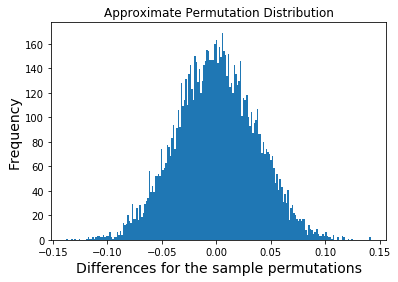

In [21]:
plt.hist(list,bins=200)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');

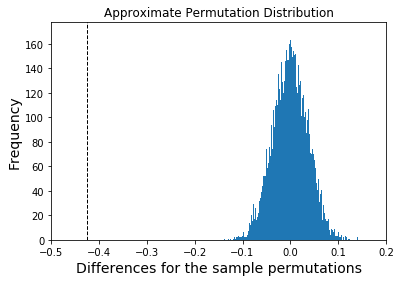

In [22]:
plt.hist(list,bins=200)
plt.axvline( np.mean(ncaPrice)-np.mean(caPrice),color='k', linestyle='dashed', linewidth=1)
plt.xlim(-0.5,0.2)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');